In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [16]:
img = cv2.imread('cameraman.png', 0)

In [18]:
def pca(X):

    # Standardizing the data
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    covariance_matrix = np.cov(X_standardized, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sorting the eigenvalues in descending order and the eigenvectors will rearrange accordingly.
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Selecting Principle Components based on the Kaiser criterion
    average_eigenvalues = np.mean(eigenvalues)
    num_components = np.sum(eigenvalues > average_eigenvalues)

    # Selecting the top k eigenvectors (the principal components)
    selected_eigenvectors = eigenvectors[:, :num_components]
    projected_data = np.dot(X_standardized, selected_eigenvectors)

    return projected_data, selected_eigenvectors

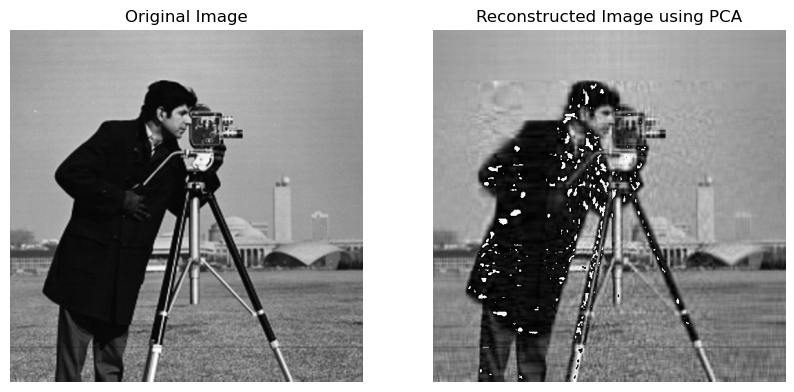

In [19]:
image_2d = img.reshape(-1, img.shape[1])
projected_data, selected_eigenvectors = pca(image_2d)

reconstructed_image = np.dot(projected_data, selected_eigenvectors.T)
reconstructed_image = (reconstructed_image * np.std(image_2d, axis=0)) + np.mean(image_2d, axis=0)
reconstructed_image = np.uint8(reconstructed_image.reshape(img.shape))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image using PCA')
plt.axis('off')

plt.show()